In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
cab = pd.read_csv("C:/Users/manuv/Downloads/Cab_Data.csv")
cab.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
city = pd.read_csv("C:/Users/manuv/Downloads/City.csv")
city.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:
tran = pd.read_csv("C:/Users/manuv/Downloads/Transaction_ID.csv")
tran.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [5]:
customer = pd.read_csv("C:/Users/manuv/Downloads/Customer_ID.csv")
customer.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:

cab.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [7]:

city.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [8]:

tran.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [9]:

customer.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [10]:
df1 = cab.merge(tran,on='Transaction ID').merge(customer,on='Customer ID').merge(city,on='City')

In [11]:
df1.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [12]:
df1.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 38.4+ MB


In [14]:
for column in df1.columns:
    if '' in column:
        df1 = df1.rename(columns={column:column.replace(' ','_')})
        
for column in ['Population','Users']:
    df1[column] = df1[column].str.replace(',','')
    
df1.head(5)    

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [15]:
for column in ['Company', 'City', 'Payment_Mode', 'Gender']:
    df1[column] = df1[column].astype('category')
for column in ['Population', 'Users']:
    df1[column] = df1[column].astype('int64')

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Transaction_ID      359392 non-null  int64   
 1   Date_of_Travel      359392 non-null  int64   
 2   Company             359392 non-null  category
 3   City                359392 non-null  category
 4   KM_Travelled        359392 non-null  float64 
 5   Price_Charged       359392 non-null  float64 
 6   Cost_of_Trip        359392 non-null  float64 
 7   Customer_ID         359392 non-null  int64   
 8   Payment_Mode        359392 non-null  category
 9   Gender              359392 non-null  category
 10  Age                 359392 non-null  int64   
 11  Income_(USD/Month)  359392 non-null  int64   
 12  Population          359392 non-null  int64   
 13  Users               359392 non-null  int64   
dtypes: category(4), float64(3), int64(7)
memory usage: 28.8 MB


In [17]:
# converting excel format date to yyyy-mm-dd format

df1['Date_of_Travel'] = pd.to_datetime(df1['Date_of_Travel'], origin='1899-12-30', unit='D')
df1.head(10)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701
9,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701


In [25]:
df1['Year'] = df1['Date_of_Travel'].dt.year
df1['Month'] = df1['Date_of_Travel'].dt.month

In [26]:
df1.head(5)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016,1
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018,7
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018,11
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016,1
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018,4


In [52]:
df = df1.drop('Date_of_Travel',axis=1)

In [53]:
df.head(5)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016,1
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018,7
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018,11
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016,1
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018,4


In [54]:
#Finding total number of customers for both cabs

df['Customer_ID'].nunique()

46148

In [55]:
#Finding number of customers for each Cab
num= df.groupby(['Company'])['Customer_ID'].nunique()
print(num)

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer_ID, dtype: int64


<Axes: xlabel='Company', ylabel='count'>

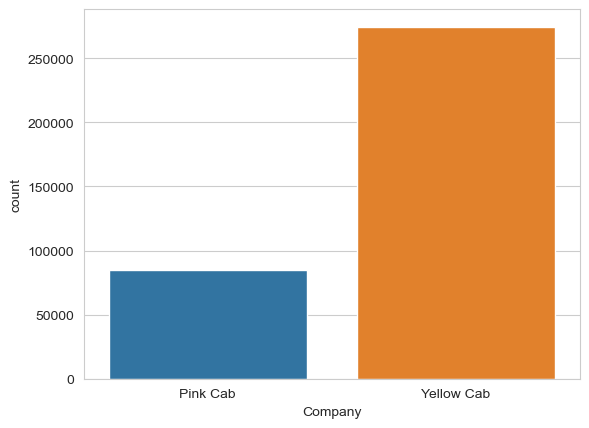

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='Company',data=df)

# From the countplot it is clear that number of customers for yellow cab is greater than that of pink cab

<Axes: xlabel='Company', ylabel='count'>

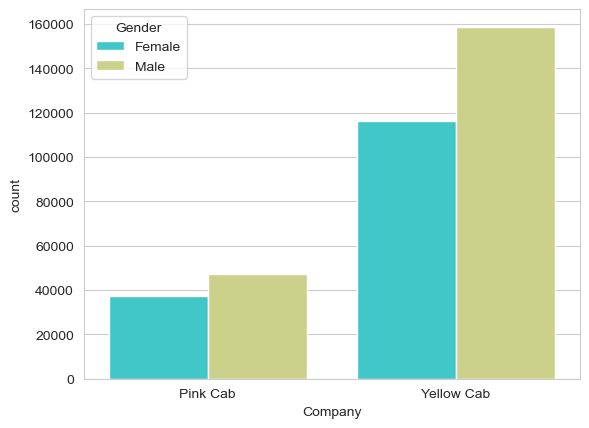

In [57]:
sns.countplot(x='Company',hue='Gender',data=df,palette='rainbow')

# in both cab, number of male passenger is higher than female

In [ ]:
Total Transactions by Month (Yellow Cab)

trans_per_y = df[df.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count().sort_values(ascending=True)

In [165]:
trans_per_y

Month
2     14932
4     17351
3     17423
1     18117
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: Transaction_ID, dtype: int64

# Transcation during the month of October , November , December is Higher than that of other months

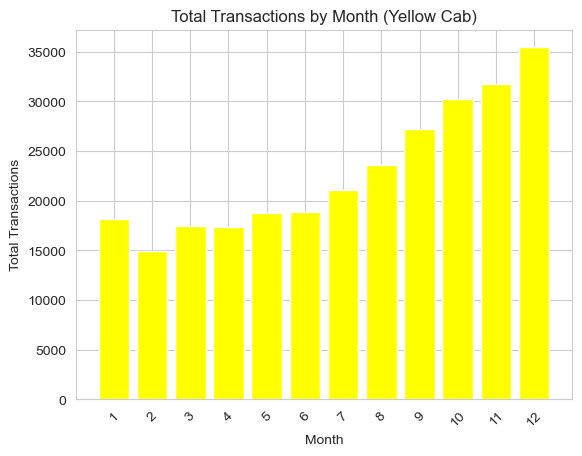

In [167]:
plt.bar(trans_per_y.index, trans_per_y.values, color = 'yellow' ) 
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Month (Yellow Cab)')
plt.xticks(trans_per_y.index, rotation = 45) 
plt.show()

In [160]:
#Total Transactions by Month (Pink Cab)
trans_per_p = df[df.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count().sort_values(ascending=False)
trans_per_p

Month
12    11568
11    11005
10    10576
9      9658
8      7739
7      6590
6      5877
1      5057
5      4960
3      4223
4      4083
2      3375
Name: Transaction_ID, dtype: int64

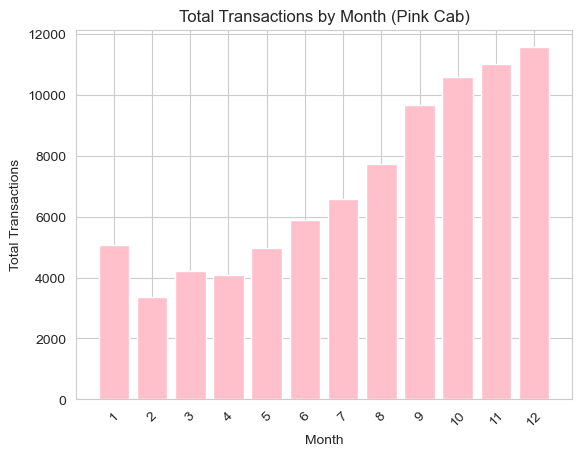

In [126]:
plt.bar(trans_per_p.index, trans_per_p.values, color = 'pink' ) 
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Month (Pink Cab)')
plt.xticks(trans_per_p.index, rotation = 45) 
plt.show()

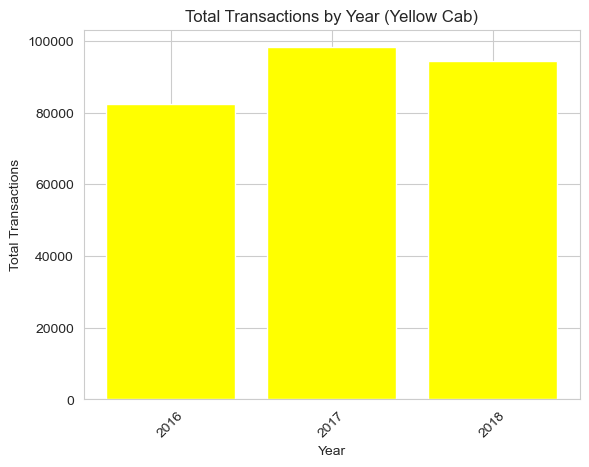

In [133]:
trans_per_year = df[df.Company=='Yellow Cab'].groupby(['Year']).Transaction_ID.count()
trans_per_year
plt.bar(trans_per_year.index, trans_per_year.values, color = 'yellow' ) 
plt.xlabel('Year')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Year (Yellow Cab)')
plt.xticks(trans_per_year.index, rotation = 45) 
plt.show()

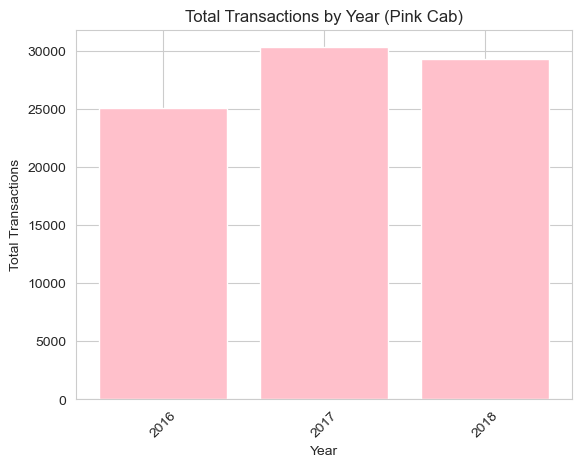

In [132]:
trans_per_yearp = df[df.Company=='Pink Cab'].groupby(['Year']).Transaction_ID.count()
trans_per_yearp
plt.bar(trans_per_yearp.index, trans_per_yearp.values, color = 'pink' ) 
plt.xlabel('Year')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Year (Pink Cab)')
plt.xticks(trans_per_yearp.index, rotation = 45) 
plt.show()


In [146]:
city_count_y = df[df.Company=='Yellow Cab'].groupby(['City']).Transaction_ID.count().sort_values(ascending=False)
city_count_y

City
NEW YORK NY       85918
CHICAGO IL        47264
WASHINGTON DC     40045
LOS ANGELES CA    28168
BOSTON MA         24506
SAN DIEGO CA       9816
ATLANTA GA         5795
DALLAS TX          5637
SEATTLE WA         5265
SILICON VALLEY     4722
MIAMI FL           4452
AUSTIN TX          3028
ORANGE COUNTY      2469
DENVER CO          2431
PHOENIX AZ         1200
NASHVILLE TN       1169
TUCSON AZ          1132
SACRAMENTO CA      1033
PITTSBURGH PA       631
Name: Transaction_ID, dtype: int64

# Most number of transcation is from New York city

In [145]:
city_count_p = df[df.Company=='Pink Cab'].groupby(['City']).Transaction_ID.count().sort_values(ascending=False)
city_count_p

City
LOS ANGELES CA    19865
NEW YORK NY       13967
SAN DIEGO CA      10672
CHICAGO IL         9361
BOSTON MA          5186
SILICON VALLEY     3797
WASHINGTON DC      3692
SEATTLE WA         2732
MIAMI FL           2002
AUSTIN TX          1868
NASHVILLE TN       1841
ATLANTA GA         1762
ORANGE COUNTY      1513
DENVER CO          1394
DALLAS TX          1380
SACRAMENTO CA      1334
PHOENIX AZ          864
TUCSON AZ           799
PITTSBURGH PA       682
Name: Transaction_ID, dtype: int64

In [156]:
Pink_df = df[df['Company'] == 'Pink Cab'] 
Yellow_df = df[df['Company'] == 'Yellow Cab']
columns = ['KM_Travelled','Price_Charged','Cost_of_Trip', 'Age' ,'Income_(USD/Month)', 'Population' , 'Users']

In [158]:
filtr_df_y= Pink_df[columns]
filtr_df_y.describe()


,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,8.471100e+04,84711.000000
mean,22.559917,310.800856,248.148682,35.322414,15059.047137,2.350642e+06,125590.813330
std,12.231092,181.995661,135.403345,12.644780,7991.077762,2.734890e+06,94593.433659
min,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,12.000000,159.970000,131.868000,25.000000,8371.000000,8.148850e+05,27247.000000
50%,22.440000,298.060000,246.330000,33.000000,14713.000000,1.595037e+06,144132.000000
75%,32.960000,441.505000,360.180000,42.000000,21055.000000,1.955130e+06,164468.000000
max,48.000000,1623.480000,576.000000,65.000000,35000.000000,8.405837e+06,302149.000000


In [159]:
filtr_df_y= Yellow_df[columns]
filtr_df_y.describe()

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,2.746810e+05,274681.000000
mean,22.569517,458.181990,297.922004,35.341112,15045.669817,3.373228e+06,168473.246981
std,12.234298,288.386166,162.548986,12.578625,7962.727062,3.439014e+06,100570.558886
min,1.900000,20.730000,22.800000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,11.990000,226.680000,158.400000,25.000000,8439.000000,6.712380e+05,80021.000000
50%,22.440000,425.060000,295.596000,33.000000,14676.000000,1.595037e+06,144132.000000
75%,32.960000,633.880000,432.432000,42.000000,21023.000000,8.405837e+06,302149.000000
max,48.000000,2048.030000,691.200000,65.000000,34996.000000,8.405837e+06,302149.000000


In [173]:
yellow_cab_price = Yellow_df.groupby('Year')['Price_Charged'].mean()
yellow_cab_cost = Yellow_df.groupby('Year')['Cost_of_Trip'].mean()

In [175]:
yellow_cab_price

Year
2016    467.918301
2017    466.639950
2018    440.875558
Name: Price_Charged, dtype: float64

In [176]:
yellow_cab_cost

Year
2016    298.570481
2017    297.822893
2018    297.459436
Name: Cost_of_Trip, dtype: float64

In [196]:
yellow_cab_charged= Yellow_df.groupby('Year')['Price_Charged'].mean()
yellow_cab_cost = Yellow_df.groupby('Year')['Cost_of_Trip'].mean()

In [199]:
pink_cab_charged= Pink_df.groupby('Year')['Price_Charged'].mean()
pink_cab_cost = Pink_df.groupby('Year')['Cost_of_Trip'].mean()

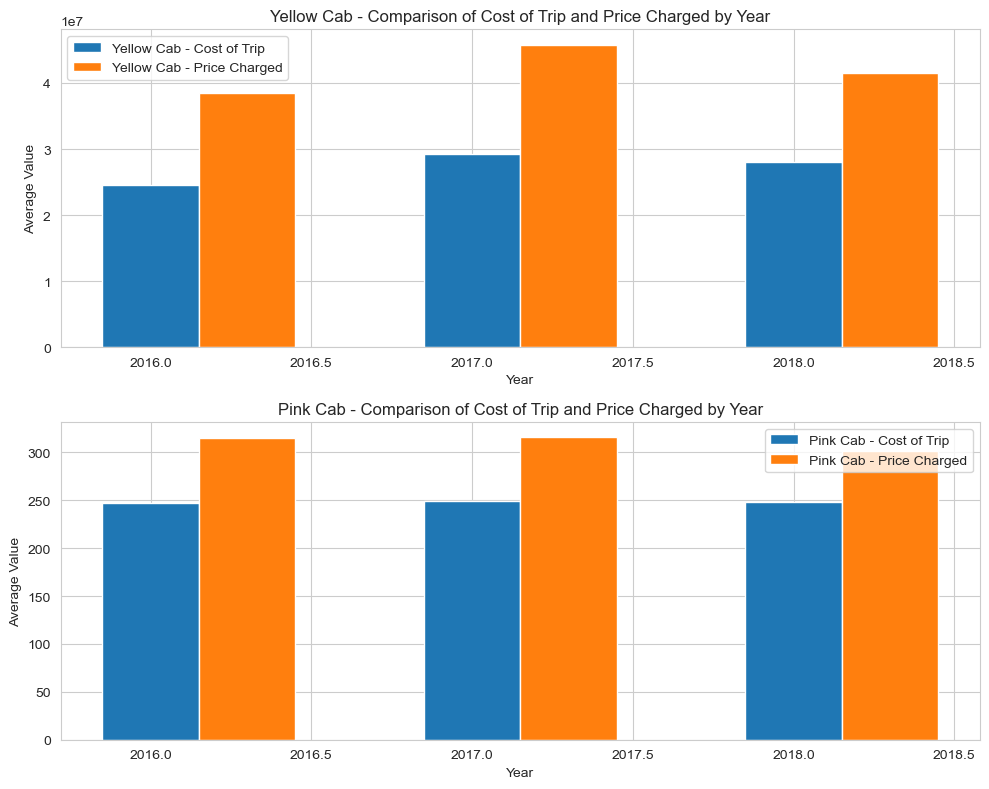

In [214]:
bar_width = 0.30
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.bar(yellow_cab_cost.index, yellow_cab_cost, bar_width, label='Yellow Cab - Cost of Trip')
ax1.bar(yellow_cab_charged.index + bar_width, yellow_cab_charged, bar_width, label='Yellow Cab - Price Charged')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Value')
ax1.set_title('Yellow Cab - Comparison of Cost of Trip and Price Charged by Year')

ax1.legend()




ax2.bar(pink_cab_cost.index, pink_cab_cost, bar_width, label='Pink Cab - Cost of Trip')
ax2.bar(pink_cab_charged.index + bar_width, pink_cab_charged, bar_width, label='Pink Cab - Price Charged')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Value')
ax2.set_title('Pink Cab - Comparison of Cost of Trip and Price Charged by Year')
ax2.legend()


plt.tight_layout()
plt.show()

#  during the 3 years price charged to the cost of travel by the yellow cab is always higher.
# So that profit of yellow cab is higher

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Transaction_ID      359392 non-null  int64   
 1   Company             359392 non-null  category
 2   City                359392 non-null  category
 3   KM_Travelled        359392 non-null  float64 
 4   Price_Charged       359392 non-null  float64 
 5   Cost_of_Trip        359392 non-null  float64 
 6   Customer_ID         359392 non-null  int64   
 7   Payment_Mode        359392 non-null  category
 8   Gender              359392 non-null  category
 9   Age                 359392 non-null  int64   
 10  Income_(USD/Month)  359392 non-null  int64   
 11  Population          359392 non-null  int64   
 12  Users               359392 non-null  int64   
 13  Year                359392 non-null  int32   
 14  Month               359392 non-null  int32   
dtypes: category(4), f